---
title: Fashion MNIST
categories: deep-learning
date: 2020-12-15
---


数据集State-of-the-Art详见

- [mnist](https://paperswithcode.com/sota/image-classification-on-mnist)
- [fashion-mnist](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)
- [cifar-10](https://paperswithcode.com/sota/image-classification-on-cifar-10)

## 初始化

首先引入所用的包。然后是一些公共函数。下面代码比较长，可以先把函数的中文解释看过就好，细节忽略，后面用到再回来看。

In [1]:
import sys
from tensorflow.keras import Model, layers, regularizers, preprocessing

base_path = '/tf/eipi10/xuxiangwen.github.io/_notes/05-ai/54-tensorflow/code'
sys.path.append(base_path)

from image_classification import set_gpu_memory, lr_schedule, image_data_generator 
from image_classification import ImageClassificationHelper, ImageDataset

set_gpu_memory(1024)
model_results={}

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

# #当module有新的方法的时候，需要运行下面方法。
# %reload_ext autoreload

set max gpu memory to 1024


下面初始化模型运行的参数。

In [2]:
def image_data_generator():
    datagen = preprocessing.image.ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # randomly flip images
        horizontal_flip=False,
        # randomly flip images
        vertical_flip=False
    )    
    return datagen  

params = {
    'dataset_name': 'fashion-mnist-aug',
    'validation_percent': 0,    
    'use_data_augmentation': True,
    'augmentation_generator': image_data_generator(),   
    'batch_size': 32,    
    'epochs': 120,    
    'learning_rate':0.001,
    'dropout':0.1,
    'metrics':['accuracy'], 
    'use_lr_schedule': False,
    'lr_schedule': lr_schedule,
    'model_params':{
        'mlp':{'dropout':0.1},
        'lenet':{'dropout':0.1},
        'custom':{'dropout':0.2},
        'vgg':{'dropout':0.3},
        'resnet':{}
    }
}

helper = ImageClassificationHelper()
helper.set_params(params)
helper.set_model_results(model_results)
helper.set_data(ImageDataset(params))

load fashion-mnist-aug data from source
train: (60000, 28, 28, 1) (60000,)
test: (10000, 28, 28, 1) (10000,)
create train, validation and test dataset


## 数据

MNIST数据集包含60,000张training图片和10,000张test图片，每张图片由$28\times28$ 个像素点构成，每个像素点用一个灰度值(0−255)表示。下面查看一下其中的图片。

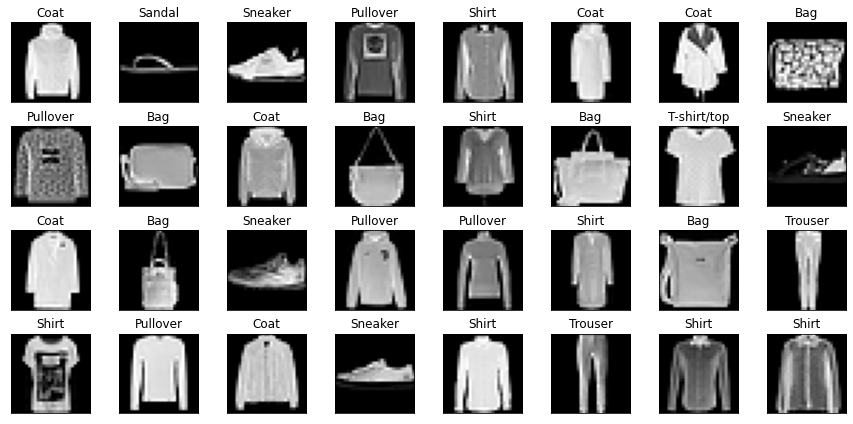

In [3]:
images, labels = iter(helper.data.train_dataset).next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

然后看看做了data augmentation的图片。

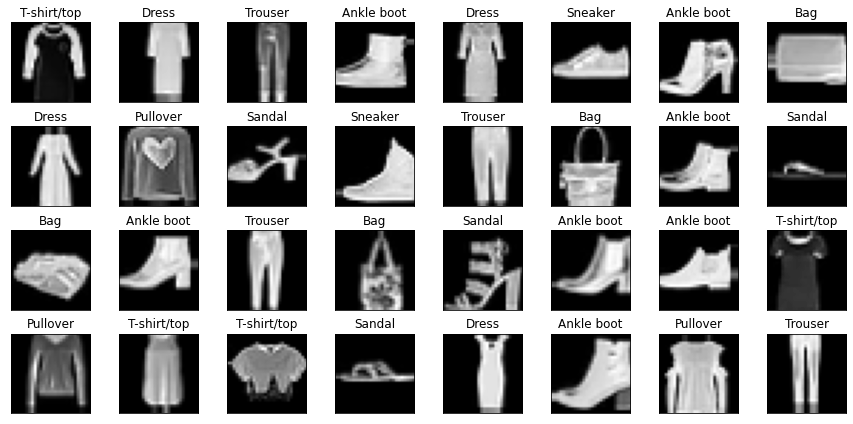

In [4]:
images, labels = helper.data.train_dataset_aug.next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

下面来看看各个class的数据分布。可以看到各个数字的分布还是比较均匀的。

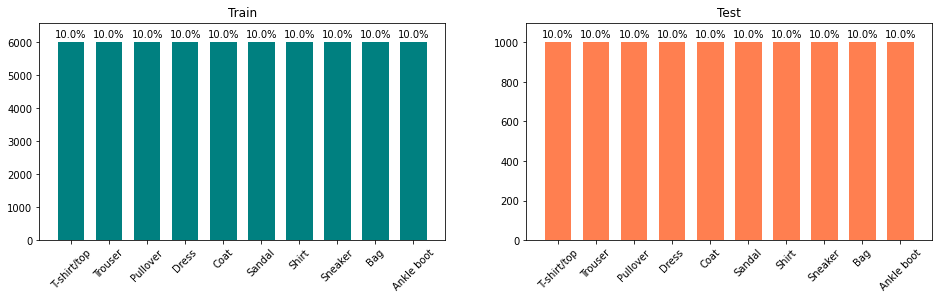

In [5]:
helper.plot_distribution()

## MLP

In [6]:
def get_mlp(helper, name='mlp', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Flatten()(input)
    x = layers.Dense(128, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model

model = get_mlp(helper)
model.summary()

dropout=0.1
learning_rate=0.001
checkpoint_path=./checkpoints/fashion-mnist-aug/mlp/checkpoint
Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________




下面来训练模型。

2020-12-25 16:01:12,017: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7406 - accuracy: 0.7252 - val_loss: 0.5724 - val_accuracy: 0.7910
Epoch 2/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5813 - accuracy: 0.7836 - val_loss: 0.5054 - val_accuracy: 0.8149
Epoch 3/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5375 - accuracy: 0.8005 - val_loss: 0.4841 - val_accuracy: 0.8150
Epoch 4/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5164 - accuracy: 0.8081 - val_loss: 0.4842 - val_accuracy: 0.8049
Epoch 5/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5003 - accuracy: 0.8130 - val_loss: 0.4509 - val_accuracy: 0.8342
Epoch 6/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4881 - accuracy: 0.8188 - val_loss: 0.4633 - val_accuracy: 0.8267
Epoch 7/120
1875/1875 [========================

Epoch 56/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4006 - accuracy: 0.8531 - val_loss: 0.3783 - val_accuracy: 0.8656
Epoch 57/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3956 - accuracy: 0.8548 - val_loss: 0.3672 - val_accuracy: 0.8713
Epoch 58/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3961 - accuracy: 0.8551 - val_loss: 0.3841 - val_accuracy: 0.8583
Epoch 59/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3940 - accuracy: 0.8554 - val_loss: 0.3805 - val_accuracy: 0.8631
Epoch 60/120
1873/1875 [============================>.] - ETA: 0s - loss: 0.3913 - accuracy: 0.8553
Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.00031622778103685084.
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3914 - accuracy: 0.8553 - val_loss: 0.3846 - val_accuracy: 0.8662
Epoch 61/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3706 - acc

1875/1875 [==============================] - 20s 11ms/step - loss: 0.3499 - accuracy: 0.8711 - val_loss: 0.3478 - val_accuracy: 0.8768
Epoch 110/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3504 - accuracy: 0.8704 - val_loss: 0.3455 - val_accuracy: 0.8770
Epoch 111/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3492 - accuracy: 0.8707 - val_loss: 0.3465 - val_accuracy: 0.8780
Epoch 112/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3524 - accuracy: 0.8701 - val_loss: 0.3466 - val_accuracy: 0.8790
Epoch 113/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3521 - accuracy: 0.8708 - val_loss: 0.3470 - val_accuracy: 0.8780
Epoch 114/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3521 - accuracy: 0.8701 - val_loss: 0.3475 - val_accuracy: 0.8763
Epoch 115/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3498 - accuracy: 0.8717 - val_loss: 0

2020-12-25 16:41:29,808: INFO: finish training [elapsed time: 2417.79 seconds]


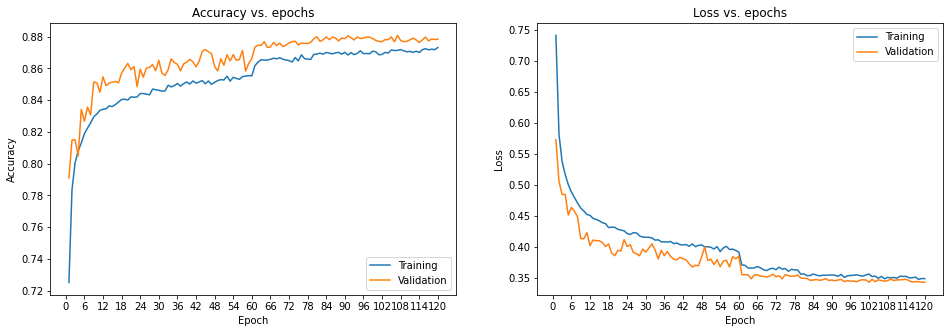

In [7]:
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.3446, Test Accuracy:88.08%
---------------------------------------- confusion matrix ----------------------------------------


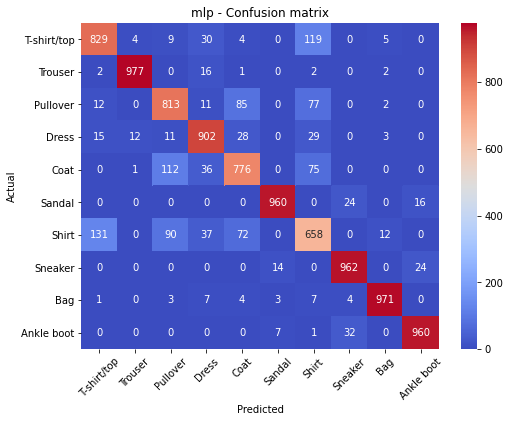

---------------------------------------- model improvement ----------------------------------------


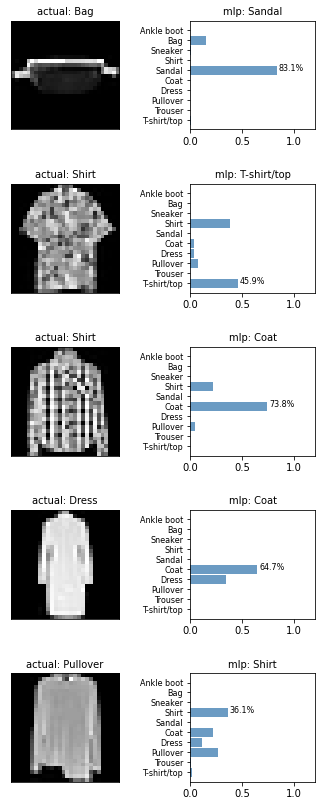

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
mlp,0.290463,0.8934,0.344575,0.8808,101770,2417.0


In [8]:
helper.model_summary(model, history=history)




从上面的错误来看，模型对一些细节的判断不是很准。下面来尝试一下LeNet。

## LeNet

![image-20201019113632136](images/image-20201019113632136.png)

LeNet诞生于1994年，是Yann LeCun等人提出的，是最早的卷积神经网络之一。在LeNet中，输入层是32×32的图片，而MNIST是28×28的图片，为了保持模型的结构不变，在第一个Conv2D设置参数padding=’same’。首先创建模型，并训练。

In [9]:
def get_lenet(helper, name='lenet', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(6, (5, 5), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(16, (5, 5), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(84, activation='relu')(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)  

    return model    

# 创建模型
model = get_lenet(helper)
model.summary()

dropout=0.1
learning_rate=0.001
checkpoint_path=./checkpoints/fashion-mnist-aug/lenet/checkpoint
Model: "lenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
______________________________



下面来训练模型。

2020-12-25 16:41:37,964: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6238 - accuracy: 0.7636 - val_loss: 0.4453 - val_accuracy: 0.8353
Epoch 2/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4723 - accuracy: 0.8223 - val_loss: 0.3764 - val_accuracy: 0.8603
Epoch 3/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4346 - accuracy: 0.8364 - val_loss: 0.3506 - val_accuracy: 0.8663
Epoch 4/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4121 - accuracy: 0.8438 - val_loss: 0.3323 - val_accuracy: 0.8723
Epoch 5/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3978 - accuracy: 0.8508 - val_loss: 0.3179 - val_accuracy: 0.8775
Epoch 6/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3805 - accuracy: 0.8572 - val_loss: 0.3255 - val_accuracy: 0.8760
Epoch 7/120
1875/1875 [========================

Epoch 56/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2778 - accuracy: 0.8949 - val_loss: 0.2586 - val_accuracy: 0.8994
Epoch 57/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2747 - accuracy: 0.8960 - val_loss: 0.2587 - val_accuracy: 0.9033
Epoch 58/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2776 - accuracy: 0.8964 - val_loss: 0.2454 - val_accuracy: 0.9071
Epoch 59/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2747 - accuracy: 0.8957 - val_loss: 0.2486 - val_accuracy: 0.9069
Epoch 60/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2746 - accuracy: 0.8956 - val_loss: 0.2497 - val_accuracy: 0.9062
Epoch 61/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2731 - accuracy: 0.8963 - val_loss: 0.2425 - val_accuracy: 0.9108
Epoch 62/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2722 - accuracy: 0.8979 - val_

1875/1875 [==============================] - 20s 11ms/step - loss: 0.2377 - accuracy: 0.9100 - val_loss: 0.2265 - val_accuracy: 0.9178
Epoch 110/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2374 - accuracy: 0.9103 - val_loss: 0.2252 - val_accuracy: 0.9184
Epoch 111/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2390 - accuracy: 0.9084 - val_loss: 0.2249 - val_accuracy: 0.9184
Epoch 112/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2351 - accuracy: 0.9100 - val_loss: 0.2245 - val_accuracy: 0.9183
Epoch 113/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2363 - accuracy: 0.9098 - val_loss: 0.2249 - val_accuracy: 0.9184
Epoch 114/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2381 - accuracy: 0.9098 - val_loss: 0.2339 - val_accuracy: 0.9118
Epoch 115/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2372 - accuracy: 0.9111 - val_loss: 0

2020-12-25 17:22:13,816: INFO: finish training [elapsed time: 2435.85 seconds]


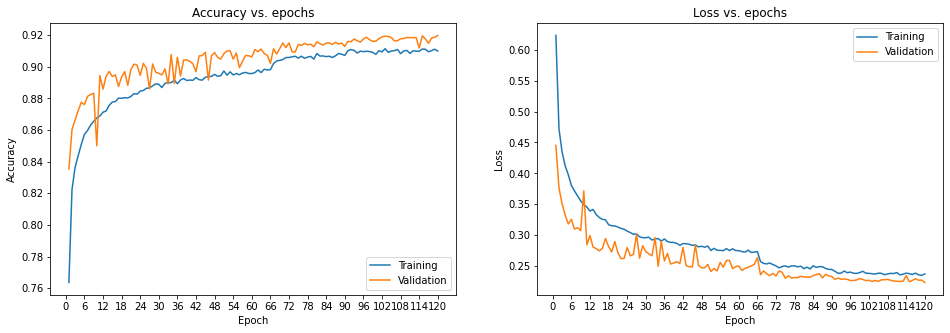

In [10]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)



下面来评估模型并和mlp模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.2230, Test Accuracy:91.98%
---------------------------------------- confusion matrix ----------------------------------------


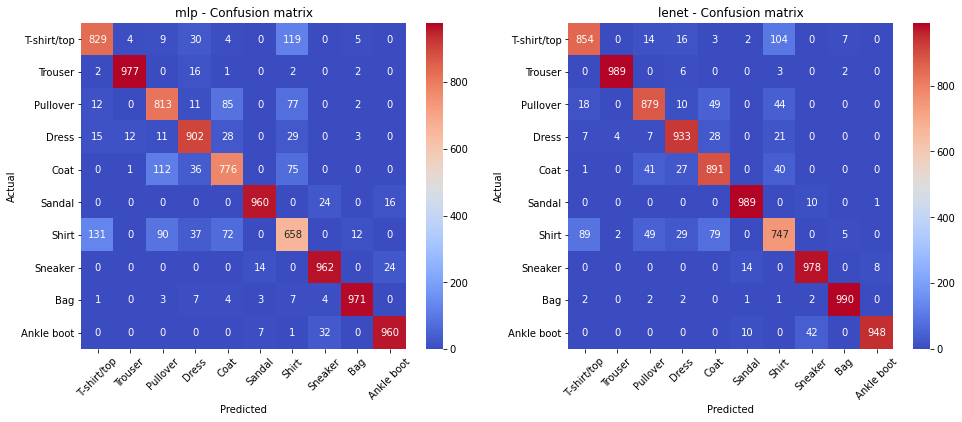

---------------------------------------- model improvement ----------------------------------------


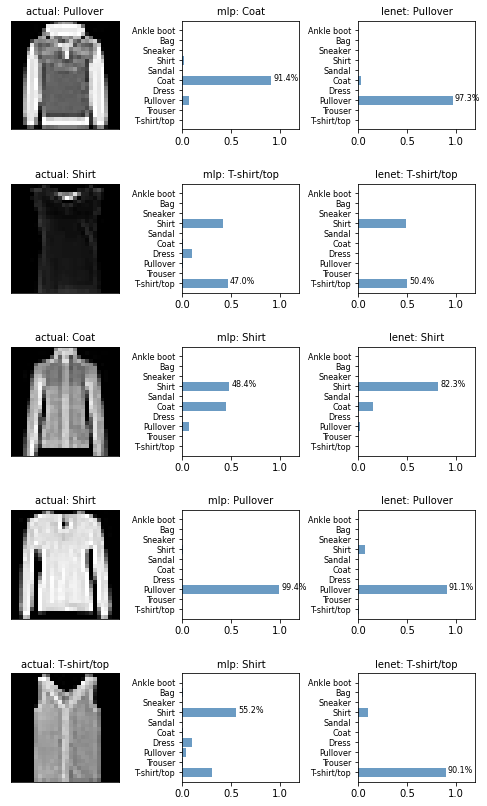

---------------------------------------- error analysis ----------------------------------------


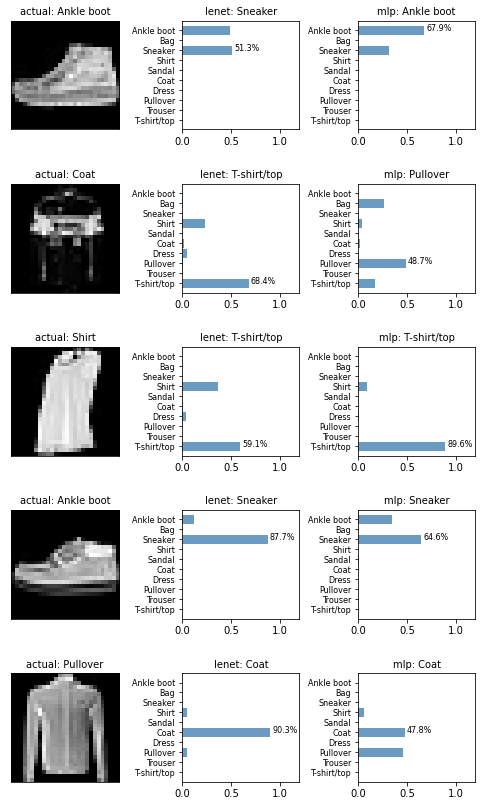

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
lenet,0.164457,0.9375,0.222985,0.9198,61750,2435.0
mlp,0.290463,0.8934,0.344575,0.8808,101770,2417.0


In [11]:
helper.model_summary(model, history=history)



从上面的图中，可以看到，Lenet的参数只有mlp的60%，但其的准确率比mlp提升了差不多1%。上面最后一张图中，有三列，第一列是数字图片，它们是mlp中分错的数字，第二列是mlp中的分类，第三列是lenet中的分类，可以看到lenet的确学到了一些mlp中没有的模式。下面再来看看哪些数字在lenet也分错了。


上图中，可以看到对于部分数字的识别，mlp甚至要更好一点啊，还有一些数字，则是一起都错了。

## Custom 1

下面自己定义一个模型，这个模型和lenet的主要区别是，增加了卷积的深度。

In [12]:
def get_custom1(helper, name='custom_cnn', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x) 
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)  
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model   

# 创建模型
model = get_custom1(helper)
model.summary()

dropout=0.2
learning_rate=0.001
checkpoint_path=./checkpoints/fashion-mnist-aug/custom_cnn/checkpoint
Model: "custom_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
____________________


可以发现参数的个数已经和mlp差不多了，下面来训练模型。

2020-12-25 17:22:28,322: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6842 - accuracy: 0.7455 - val_loss: 0.4659 - val_accuracy: 0.8258
Epoch 2/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4772 - accuracy: 0.8220 - val_loss: 0.3921 - val_accuracy: 0.8504
Epoch 3/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4262 - accuracy: 0.8425 - val_loss: 0.3744 - val_accuracy: 0.8593
Epoch 4/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3994 - accuracy: 0.8528 - val_loss: 0.3213 - val_accuracy: 0.8799
Epoch 5/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3807 - accuracy: 0.8601 - val_loss: 0.3042 - val_accuracy: 0.8857
Epoch 6/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3648 - accuracy: 0.8665 - val_loss: 0.2950 - val_accuracy: 0.8909
Epoch 7/120
1875/1875 [========================

Epoch 56/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2556 - accuracy: 0.9066 - val_loss: 0.2270 - val_accuracy: 0.9125
Epoch 57/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2549 - accuracy: 0.9066 - val_loss: 0.2554 - val_accuracy: 0.9026
Epoch 58/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2551 - accuracy: 0.9050 - val_loss: 0.2530 - val_accuracy: 0.9035
Epoch 59/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2559 - accuracy: 0.9064 - val_loss: 0.2195 - val_accuracy: 0.9188
Epoch 60/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2559 - accuracy: 0.9065 - val_loss: 0.2456 - val_accuracy: 0.9057
Epoch 61/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2557 - accuracy: 0.9049 - val_loss: 0.2580 - val_accuracy: 0.9006
Epoch 62/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2530 - accuracy: 0.9061 - val_

1875/1875 [==============================] - 21s 11ms/step - loss: 0.2245 - accuracy: 0.9171 - val_loss: 0.1995 - val_accuracy: 0.9251
Epoch 111/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2222 - accuracy: 0.9176 - val_loss: 0.1924 - val_accuracy: 0.9291
Epoch 112/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2216 - accuracy: 0.9188 - val_loss: 0.2006 - val_accuracy: 0.9265
Epoch 113/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2217 - accuracy: 0.9179 - val_loss: 0.2037 - val_accuracy: 0.9238
Epoch 114/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2199 - accuracy: 0.9204 - val_loss: 0.2070 - val_accuracy: 0.9224
Epoch 115/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2207 - accuracy: 0.9187 - val_loss: 0.1942 - val_accuracy: 0.9268
Epoch 116/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2197 - accuracy: 0.9193 - val_loss: 0

2020-12-25 18:03:30,121: INFO: finish training [elapsed time: 2461.80 seconds]


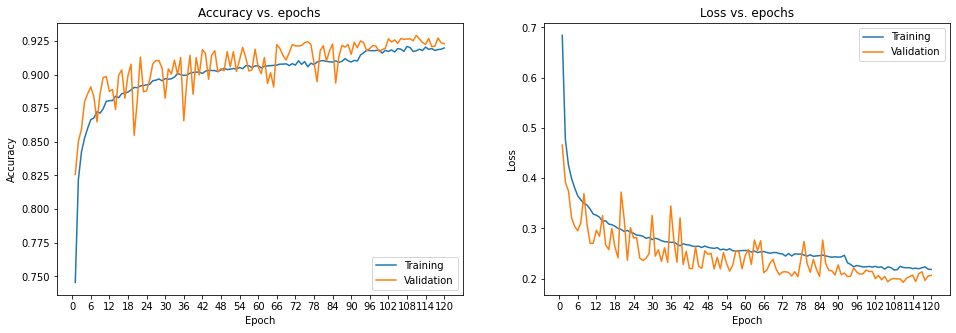

In [13]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)



下面来评估模型并和lenet模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.1924, Test Accuracy:92.91%
---------------------------------------- confusion matrix ----------------------------------------


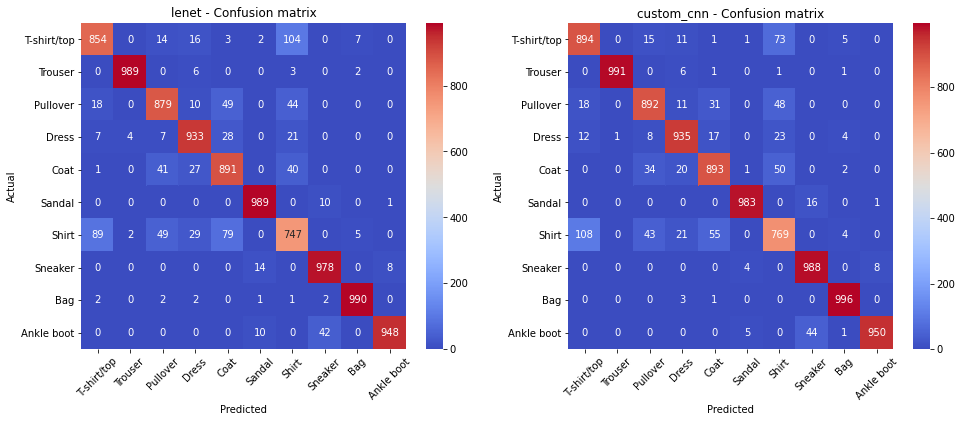

---------------------------------------- model improvement ----------------------------------------


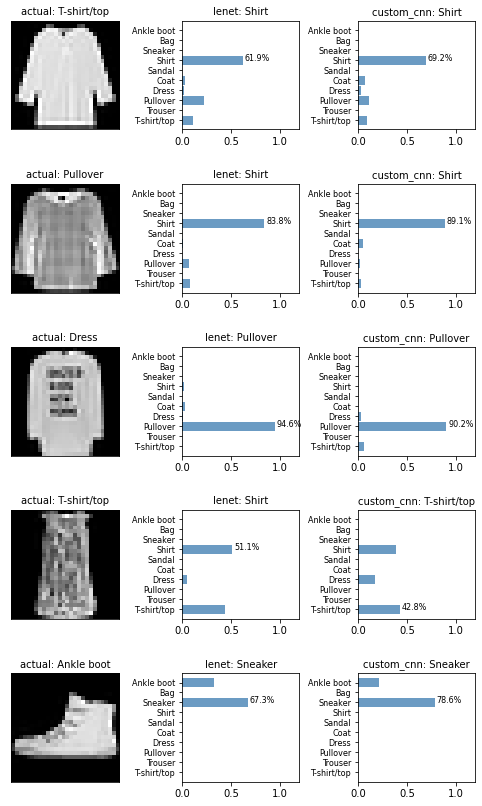

---------------------------------------- error analysis ----------------------------------------


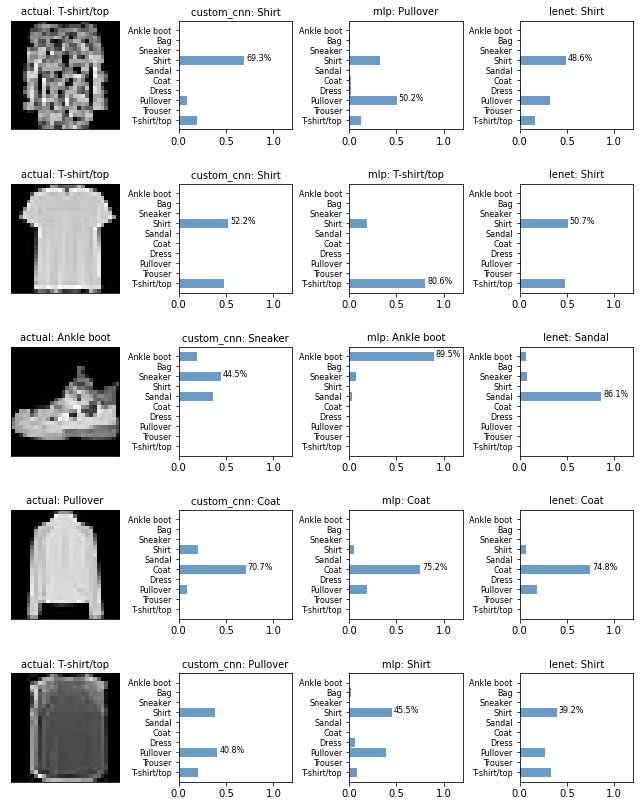

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
custom_cnn,0.148819,0.9446,0.192365,0.9291,73162,2461.0
lenet,0.164457,0.9375,0.222985,0.9198,61750,2435.0
mlp,0.290463,0.8934,0.344575,0.8808,101770,2417.0


In [14]:
helper.model_summary(model, history=history)



可以看到custom1模型的效果比lenet有些许提升（经过多次测试，平均好0.1-0.3个百分点）。上面最后一幅图，也能看到custom1模型学习到了不少新的模式。下面来看错误分析。

## VGG

In [15]:
def get_block(x, filters, conv_count, kernel_size=(3, 3), padding='same', use_bn=True, dropout=0, block_name='block'):
    for i in range(conv_count):
        x = layers.Conv2D(filters, kernel_size, padding=padding, name='{}_con{}'.format(block_name, i+1))(x)
        if use_bn: x = layers.BatchNormalization(name='{}_bn{}'.format(block_name, i+1))(x)
        x = layers.ReLU(name='{}_relu{}'.format(block_name, i+1))(x)
    x = layers.MaxPooling2D((2, 2), name='{}_maxpooling1'.format(block_name))(x)
    if dropout>0: x = layers.Dropout(dropout, name='{}_dropout1'.format(block_name))(x)
    return x
    
def get_vgg(helper, name='vgg',
              dense_layer_count=1, 
              dense_layer_units=128,
              conv_filters=64,
              block_count=3,
              use_bn=True,
              dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = input    
    for i in range(block_count): 
        x = get_block(x, conv_filters, conv_count=2, use_bn=use_bn, dropout=dropout, 
                      block_name='block{}'.format(i+1))
        conv_filters = conv_filters*2
                    
    x = layers.Flatten()(x)
    for i in range(dense_layer_count):
        x = layers.Dense(128, activation='relu')(x)
        if dropout>0: x = layers.Dropout(dropout)(x)    
    x = layers.Dense(10)(x)
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model


model = get_vgg(helper, dense_layer_count=1, block_count=3, name='vgg8')
model.summary()



dropout=0.3
learning_rate=0.001
checkpoint_path=./checkpoints/fashion-mnist-aug/vgg8/checkpoint
Model: "vgg8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
block1_con1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
block1_bn1 (BatchNormalizati (None, 28, 28, 64)        256       
_________________________________________________________________
block1_relu1 (ReLU)          (None, 28, 28, 64)        0         
_________________________________________________________________
block1_con2 (Conv2D)         (None, 28, 28, 64)        36928     
_________________________________________________________________
block1_bn2 (BatchNormalizati (None, 28, 28, 64)        256       
________________________________

2020-12-25 18:03:46,075: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6573 - accuracy: 0.7531 - val_loss: 0.9183 - val_accuracy: 0.7437
Epoch 2/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4378 - accuracy: 0.8385 - val_loss: 0.3697 - val_accuracy: 0.8644
Epoch 3/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3778 - accuracy: 0.8629 - val_loss: 0.3984 - val_accuracy: 0.8598
Epoch 4/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3361 - accuracy: 0.8786 - val_loss: 0.2675 - val_accuracy: 0.9010
Epoch 5/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3113 - accuracy: 0.8878 - val_loss: 0.2517 - val_accuracy: 0.9037
Epoch 6/120
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2926 - accuracy: 0.8956 - val_loss: 0.2564 - val_accuracy: 0.9063
Epoch 7/120
1875/1875 [========================

Epoch 56/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1058 - accuracy: 0.9610 - val_loss: 0.1831 - val_accuracy: 0.9440
Epoch 57/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0994 - accuracy: 0.9643 - val_loss: 0.1746 - val_accuracy: 0.9444
Epoch 58/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0959 - accuracy: 0.9650 - val_loss: 0.1732 - val_accuracy: 0.9473
Epoch 59/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0926 - accuracy: 0.9657 - val_loss: 0.1778 - val_accuracy: 0.9466
Epoch 60/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0919 - accuracy: 0.9661 - val_loss: 0.1808 - val_accuracy: 0.9464
Epoch 61/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0897 - accuracy: 0.9668 - val_loss: 0.1823 - val_accuracy: 0.9470
Epoch 62/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0882 - accuracy: 0.9662 - val_

Epoch 108/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0623 - accuracy: 0.9768 - val_loss: 0.1978 - val_accuracy: 0.9488
Epoch 109/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0627 - accuracy: 0.9768 - val_loss: 0.1983 - val_accuracy: 0.9488
Epoch 110/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0642 - accuracy: 0.9757 - val_loss: 0.1965 - val_accuracy: 0.9491
Epoch 111/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0617 - accuracy: 0.9771 - val_loss: 0.1981 - val_accuracy: 0.9491
Epoch 112/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0626 - accuracy: 0.9768 - val_loss: 0.1966 - val_accuracy: 0.9488
Epoch 113/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0640 - accuracy: 0.9764 - val_loss: 0.1955 - val_accuracy: 0.9490
Epoch 114/120
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0615 - accuracy: 0.9773

2020-12-25 18:59:14,607: INFO: finish training [elapsed time: 3328.53 seconds]


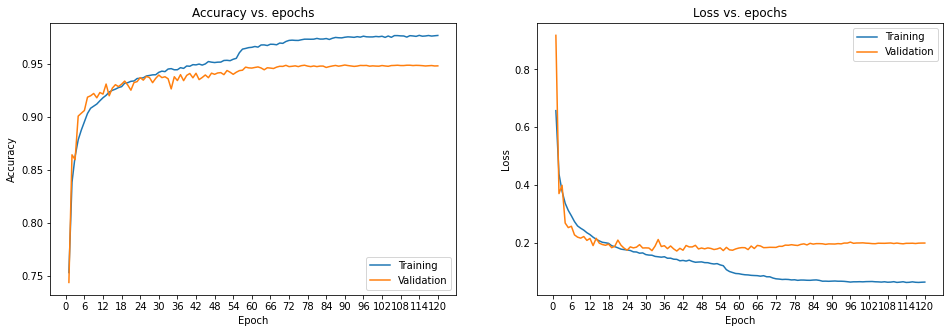

In [16]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.1950, Test Accuracy:94.93%
---------------------------------------- confusion matrix ----------------------------------------


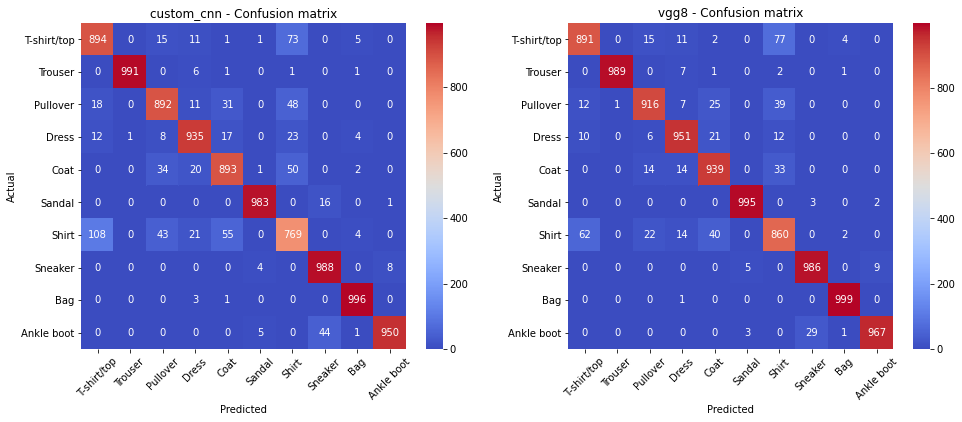

---------------------------------------- model improvement ----------------------------------------


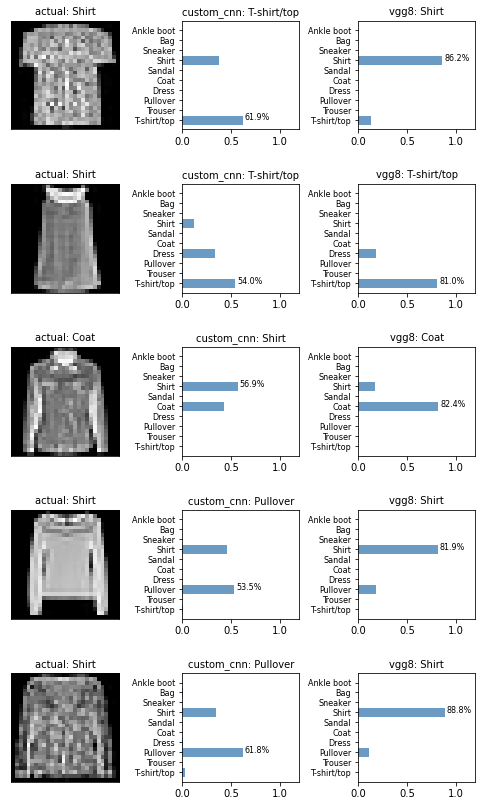

---------------------------------------- error analysis ----------------------------------------


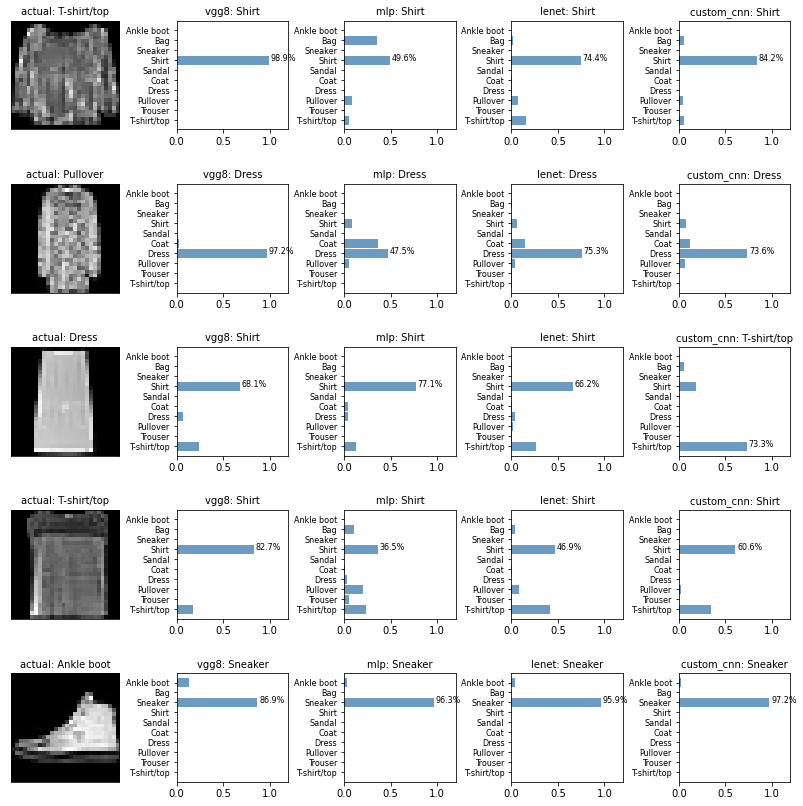

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.033524,0.9877,0.194974,0.9493,1442378,3328.0
custom_cnn,0.148819,0.9446,0.192365,0.9291,73162,2461.0
lenet,0.164457,0.9375,0.222985,0.9198,61750,2435.0
mlp,0.290463,0.8934,0.344575,0.8808,101770,2417.0


In [17]:
helper.model_summary(model, history=history)

## Resnet

参考https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter2-deep-networks/resnet-cifar10-2.2.1.py

In [18]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = layers.Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
    else:
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10, name='resnet_v1'):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = layers.Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = layers.add([x, y])
            x = layers.Activation('relu')(x)

        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = layers.AveragePooling2D(pool_size=7)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs, name=name)
    return model

def get_resnet_v1(helper, depth=32, name='resnet_v1'):       
    model = resnet_v1(helper.data.input_shape, depth=depth, name='{}_{}'.format(name, depth))
    helper.compile(model)
    return model

model = get_resnet_v1(helper, depth=20)
model.summary()

learning_rate=0.001
checkpoint_path=./checkpoints/fashion-mnist-aug/resnet_v1_20/checkpoint
Model: "resnet_v1_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 16)   160         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 28, 28, 16)   64          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization_5[0][0]  

2020-12-25 18:59:36,136: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1875/1875 [==============================] - 42s 22ms/step - loss: 0.6769 - accuracy: 0.8054 - val_loss: 0.6249 - val_accuracy: 0.8170
Epoch 2/120
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4883 - accuracy: 0.8719 - val_loss: 0.5147 - val_accuracy: 0.8660
Epoch 3/120
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4358 - accuracy: 0.8865 - val_loss: 0.4821 - val_accuracy: 0.8717
Epoch 4/120
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4061 - accuracy: 0.8938 - val_loss: 0.4549 - val_accuracy: 0.8762
Epoch 5/120
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3843 - accuracy: 0.8996 - val_loss: 0.4303 - val_accuracy: 0.8855
Epoch 6/120
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3704 - accuracy: 0.9041 - val_loss: 0.4243 - val_accuracy: 0.8847
Epoch 7/120
1875/1875 [========================

Epoch 55/120
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1649 - accuracy: 0.9614 - val_loss: 0.2549 - val_accuracy: 0.9357
Epoch 56/120
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1677 - accuracy: 0.9601 - val_loss: 0.2413 - val_accuracy: 0.9380
Epoch 57/120
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1618 - accuracy: 0.9615 - val_loss: 0.2600 - val_accuracy: 0.9323
Epoch 58/120
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1635 - accuracy: 0.9607 - val_loss: 0.2474 - val_accuracy: 0.9367
Epoch 59/120
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1618 - accuracy: 0.9603 - val_loss: 0.2514 - val_accuracy: 0.9347
Epoch 60/120
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1588 - accuracy: 0.9629 - val_loss: 0.2566 - val_accuracy: 0.9313
Epoch 61/120
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1566 - accuracy: 0.9623 - val_

Epoch 00106: early stopping


2020-12-25 20:22:45,566: INFO: finish training [elapsed time: 4989.43 seconds]


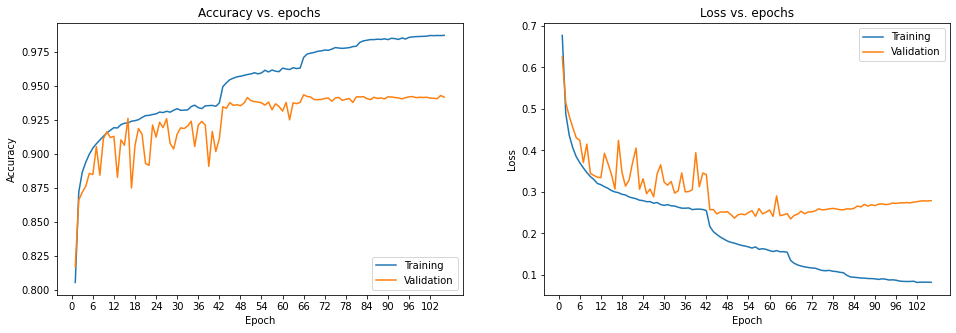

In [19]:
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.2350, Test Accuracy:94.33%
---------------------------------------- confusion matrix ----------------------------------------


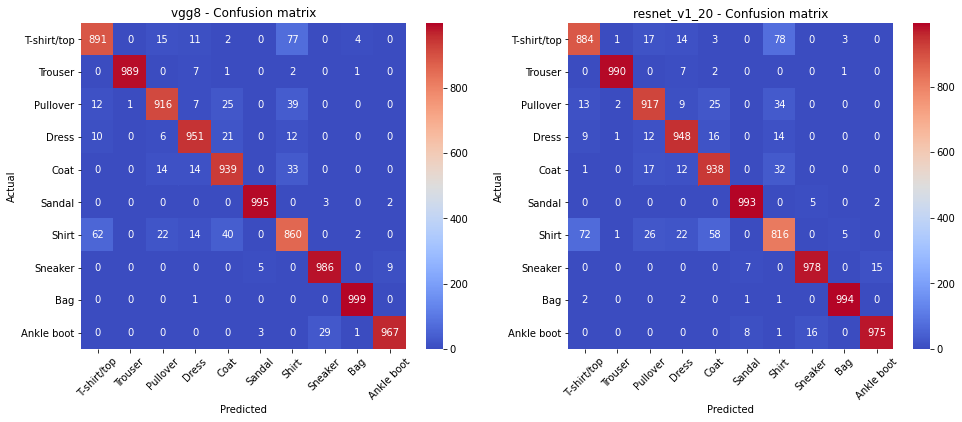

---------------------------------------- model improvement ----------------------------------------


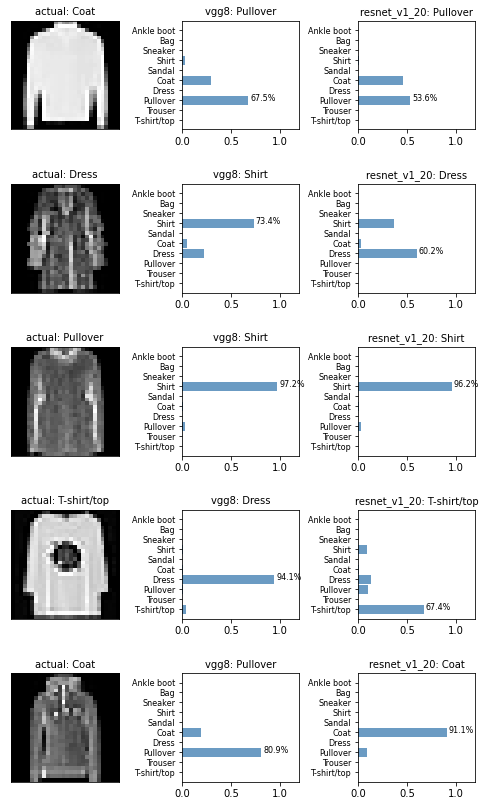

---------------------------------------- error analysis ----------------------------------------


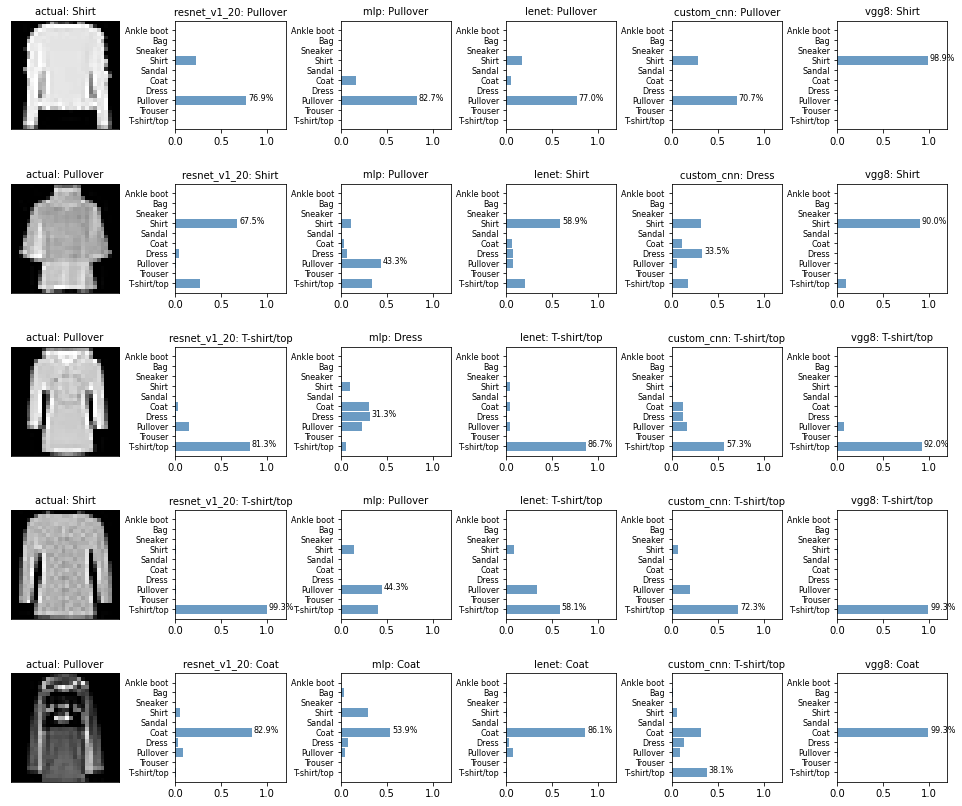

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.033524,0.9877,0.194974,0.9493,1442378,3328.0
resnet_v1_20,0.118365,0.9771,0.235033,0.9433,272778,4989.0
custom_cnn,0.148819,0.9446,0.192365,0.9291,73162,2461.0
lenet,0.164457,0.9375,0.222985,0.9198,61750,2435.0
mlp,0.290463,0.8934,0.344575,0.8808,101770,2417.0


In [20]:
helper.model_summary(model, history=history)

## 总结